<a href="https://colab.research.google.com/github/ekeng3/ACME-Software-Lab-Internship/blob/main/Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

To preprocess, clean and conduct exploratory data analysis (EDA) on the acoustic features dataset, we can follow the following steps:
1. Load the data
2. Initial data inspection
3. Data cleaning
4. Handling Missing Values
5. Data Type Conversion
6. Exploratory Data Cleaning  



1. Load the Data

In [4]:
acoustic = pd.read_csv('/content/drive/MyDrive/acoustic_features.csv.csv')
acoustic.head()

,song_id,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,3e9HZxeyfWwjeyPAMmWSSQ,207320,1,1,4,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966
1,5p7ujcrUXASCNwRaWNHR1C,201661,6,1,4,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041
2,2xLMifQCjDGFmkHkpNLD9h,312820,8,1,4,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008
3,3KkXRkHbMCARz0aVfEt68P,158040,2,1,4,0.55600,0.760,0.479,0.000000,0.0703,-5.574,0.0466,0.913,89.911
4,1rqqCSm0Qe4I9rUvWncaom,190947,5,1,4,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014


In [5]:
acoustic.shape

(20405, 14)

2. Initial Data Inspection
We need to inspect the basic structure of the data

In [6]:
# Display basic information about the dataset
acoustic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20405 entries, 0 to 20404
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           20405 non-null  object 
 1   duration_ms       20405 non-null  int64  
 2   key               20405 non-null  int64  
 3   mode              20405 non-null  int64  
 4   time_signature    20405 non-null  int64  
 5   acousticness      20405 non-null  float64
 6   danceability      20405 non-null  float64
 7   energy            20405 non-null  float64
 8   instrumentalness  20405 non-null  float64
 9   liveness          20405 non-null  float64
 10  loudness          20405 non-null  float64
 11  speechiness       20405 non-null  float64
 12  valence           20405 non-null  float64
 13  tempo             20405 non-null  float64
dtypes: float64(9), int64(4), object(1)
memory usage: 2.2+ MB


In [7]:
# Display the basic statistics for numerical features
acoustic.describe()

,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
count,2.040500e+04,20405.000000,20405.000000,20405.000000,20405.000000,20405.000000,20405.000000,20405.000000,20405.000000,20405.000000,20405.000000,20405.000000,20405.000000
mean,2.295437e+05,5.224651,0.727028,3.943592,0.265201,0.600342,0.625056,0.047546,0.192335,-8.845186,0.067537,0.607777,120.313409
std,6.705696e+04,3.567111,0.445498,0.289162,0.264370,0.150627,0.197120,0.168418,0.164047,3.593048,0.074369,0.236527,27.683465
min,2.460400e+04,0.000000,0.000000,0.000000,0.000001,0.000000,0.006640,0.000000,0.013000,-30.896000,0.000000,0.000000,0.000000
25%,1.864930e+05,2.000000,0.000000,4.000000,0.039200,0.502000,0.481000,0.000000,0.088300,-11.217000,0.031900,0.427000,99.735000
50%,2.230260e+05,5.000000,1.000000,4.000000,0.169000,0.608000,0.640000,0.000010,0.129000,-8.471000,0.040400,0.632000,118.952000
75%,2.596930e+05,8.000000,1.000000,4.000000,0.440000,0.706000,0.783000,0.001110,0.249000,-6.051000,0.063000,0.804000,135.903000
max,1.561133e+06,11.000000,1.000000,5.000000,0.995000,0.988000,0.998000,0.985000,0.997000,3.440000,0.950000,1.000000,231.028000


In [8]:
# Check for any missing values
acoustic.isnull().sum()

song_id             0
duration_ms         0
key                 0
mode                0
time_signature      0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
valence             0
tempo               0
dtype: int64

In [9]:
 # Check for data types and apply conversions if necessary
acoustic.dtypes

song_id              object
duration_ms           int64
key                   int64
mode                  int64
time_signature        int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
tempo               float64
dtype: object

In [10]:
# Load the lyrics datasets

lyrics = pd.read_csv('/content/drive/MyDrive/Cleaned_lyrics_data.csv')
lyrics.head()

,Unnamed: 0,main_genre,song_id,lyrics
0,0,dance pop,4OafepJy2teCjYJbvFE60J,[ [Intro] Lacigam gnihtemos od ot Thgin laicep...
1,1,dance pop,5OCJzvD7sykQEKHH7qAC3C,"[ [Chorus] You, you love it how I move you You..."
2,2,dance pop,2qT1uLXPVPzGgFOx4jtEuo,"[ [Intro] Right now, I'm in a state of mind I ..."
3,3,dance pop,70khXICDeTTxgYtw3EysKH,['[Chorus] When life deals us cards Make every...
4,4,dance pop,0WdR2AyLW1Drd3OUdwezM0,"[ [Intro] Back to you, back to you, back to yo..."


In [11]:
lyrics.columns

Index(['Unnamed: 0', 'main_genre', 'song_id', 'lyrics'], dtype='object')

In [12]:
# Drop the Unnamed column
lyrics.drop('Unnamed: 0', axis=1, inplace=True)
lyrics.head()

,main_genre,song_id,lyrics
0,dance pop,4OafepJy2teCjYJbvFE60J,[ [Intro] Lacigam gnihtemos od ot Thgin laicep...
1,dance pop,5OCJzvD7sykQEKHH7qAC3C,"[ [Chorus] You, you love it how I move you You..."
2,dance pop,2qT1uLXPVPzGgFOx4jtEuo,"[ [Intro] Right now, I'm in a state of mind I ..."
3,dance pop,70khXICDeTTxgYtw3EysKH,['[Chorus] When life deals us cards Make every...
4,dance pop,0WdR2AyLW1Drd3OUdwezM0,"[ [Intro] Back to you, back to you, back to yo..."


In [13]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=44c5c86bee1d5748d5433915b820b0dc3af23f212a67fb1b02a4f98dcd6536e5
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [14]:
# import libraries to detect languages in the lyrics data
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

In [15]:
# define a function that detects the lang in the lyrics feature
def detect_language(text):
    if not isinstance(text, str):
        return "non-string"
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

In [16]:
# Apply the function to detect the language of each lyrics
lyrics['detected_language'] = lyrics['lyrics'].apply(detect_language)

In [17]:
# Filter out English lyrics
lyrics_non_english = lyrics[lyrics['detected_language'] != 'en']

In [18]:
# display the detected lang
print(lyrics_non_english[['lyrics', 'detected_language']])

                                                  lyrics detected_language
247    ['[Letra de  Única ]  [Intro] Salgo a gastar u...                es
262    [ [Letra de ''Ginza'']  [Intro] Infinity  [Cor...                es
374    ['[Letra de  Felices los 4 ]  [Intro] Maluma b...                es
392    [ [Intro] Na, na, na, na, na Na, na, na, na, n...                tl
432    [ [Letra de Imitadora]  [Intro] Hey Who are yo...                es
...                                                  ...               ...
10908                                          ['♫ ♫ ♫']           unknown
10910  [ Slow down, you move too fast You got to make...                af
10915                                 ['[Instrumental]']                ro
10918                                   ['Instrumental']                ro
10936                                 ['(Instrumental)']                ro

[131 rows x 2 columns]


In [19]:
# Drop the all lyrics not in english and retain only lyrics in english
lyrics_en = lyrics[lyrics['detected_language'] == 'en']

# drop the detected_language column as it is no longer needed
lyrics_en = lyrics_en.drop(columns=['detected_language'])

In [20]:
# Check to see the filtered data with only english lyrics
lyrics_en.head()

,main_genre,song_id,lyrics
0,dance pop,4OafepJy2teCjYJbvFE60J,[ [Intro] Lacigam gnihtemos od ot Thgin laicep...
1,dance pop,5OCJzvD7sykQEKHH7qAC3C,"[ [Chorus] You, you love it how I move you You..."
2,dance pop,2qT1uLXPVPzGgFOx4jtEuo,"[ [Intro] Right now, I'm in a state of mind I ..."
3,dance pop,70khXICDeTTxgYtw3EysKH,['[Chorus] When life deals us cards Make every...
4,dance pop,0WdR2AyLW1Drd3OUdwezM0,"[ [Intro] Back to you, back to you, back to yo..."


In [21]:
# Display to compare the size of the lyrics and lyrics_en data
print(lyrics.shape)
print(lyrics_en.shape)

(11040, 4)
(10909, 3)


To clean the lyrics dataset, we should focus on  several preprocessing steps to ensure that the text is in a format suitable for analysis. Here are the steps we should take:


*  Remove any section labels such as [Intro], [Chrous], [Verse 1], and so on as they do not contribute meaningful information for most text analysis tasks
*   convert all text to lower case to ensure consistency
*   Remove Puntuations to focus only the words
*   Split the text into individual words or tokens. This can be done using spaces or delimeters
*   Remove common stop words (e.g 'and', 'the', 'it' etc) that do not carry significant meaning
*   Reduce words to their root forms to treat different forms of word as the same word ( e.g 'sing', 'singing', and 'sings' should be treated as the same word)






In [22]:
# Impport necessary libraries for the lyrics data cleaning

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [23]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
# Write a function that cleans the lyrics data

def clean_lyrics(text):
  text = re.sub(r'\[.*?\]', '', text) # Remove section labels
  text = re.sub(r'\d+', '', text) # Remove numbers
  text = text.lower() # Convert to lowercase
  text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
  tokens = word_tokenize(text) # Split into tokens
  stop_words = set(stopwords.words('english')) # Remove stop words
  filtered_tokens = [word for word in tokens if word not in stop_words] # Remove stop words
  lemmatizer = WordNetLemmatizer() # Reduce words to their root form
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens] # Reduce words to their root form
  cleaned_text = ' '.join(lemmatized_tokens) # Join tokens back into a single string
  return cleaned_text

In [25]:
# apply the function to the lyrics dataset
lyrics_en['lyrics'] = lyrics_en['lyrics'].apply(clean_lyrics)

In [26]:
# Display the cleaned lyrics
lyrics_en.head()

,main_genre,song_id,lyrics
0,dance pop,4OafepJy2teCjYJbvFE60J,lacigam gnihtemos od ot thgin laiceps ruoy sth...
1,dance pop,5OCJzvD7sykQEKHH7qAC3C,love move love touch one said done youll belie...
2,dance pop,2qT1uLXPVPzGgFOx4jtEuo,right im state mind wan na like time aint got ...
3,dance pop,70khXICDeTTxgYtw3EysKH,life deal u card make everything taste like sa...
4,dance pop,0WdR2AyLW1Drd3OUdwezM0,back back back back back back go back back bac...


In [27]:
 # merge the acoustic and lyrics dataset on song_id
merged_data = pd.merge(acoustic, lyrics_en, on='song_id')

In [28]:
merged_data.head()

,song_id,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,main_genre,lyrics
0,2xLMifQCjDGFmkHkpNLD9h,312820,8,1,4,0.00513,0.834,0.730,0.00000,0.1240,-3.714,0.2220,0.446,155.008,pop,astro yeah sun freezin cold already know winte...
1,1rqqCSm0Qe4I9rUvWncaom,190947,5,1,4,0.19300,0.579,0.904,0.00000,0.0640,-2.729,0.0618,0.681,82.014,baroque pop,high high hope high high hope living shooting ...
2,0bYg9bo50gSsH3LtXe2SQn,241107,7,1,4,0.16400,0.335,0.625,0.00000,0.0708,-7.462,0.0386,0.346,150.277,dance pop,iii dont want lot christmas one thing need don...
3,5hslUAKq9I9CG2bAulFkHN,151933,7,1,3,0.76600,0.240,0.598,0.00000,0.1170,-8.435,0.0370,0.776,202.082,adult standards,wonderful time year kid jingle belling everyon...
4,1xzBco0xcoJEDXktl7Jxrr,183907,4,1,4,0.19400,0.729,0.625,0.00986,0.2480,-5.266,0.0315,0.261,146.034,rap,yrold bitch daytrip took got hoe callin young ...


In [29]:
merged_data.shape

(10909, 16)

In [31]:
# Save the merge data as a csv
merged_data.to_csv('merged_df.csv', index=False)

In [32]:
data = pd.read_csv('/content/merged_df.csv')
data.head()

,song_id,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,main_genre,lyrics
0,2xLMifQCjDGFmkHkpNLD9h,312820,8,1,4,0.00513,0.834,0.730,0.00000,0.1240,-3.714,0.2220,0.446,155.008,pop,astro yeah sun freezin cold already know winte...
1,1rqqCSm0Qe4I9rUvWncaom,190947,5,1,4,0.19300,0.579,0.904,0.00000,0.0640,-2.729,0.0618,0.681,82.014,baroque pop,high high hope high high hope living shooting ...
2,0bYg9bo50gSsH3LtXe2SQn,241107,7,1,4,0.16400,0.335,0.625,0.00000,0.0708,-7.462,0.0386,0.346,150.277,dance pop,iii dont want lot christmas one thing need don...
3,5hslUAKq9I9CG2bAulFkHN,151933,7,1,3,0.76600,0.240,0.598,0.00000,0.1170,-8.435,0.0370,0.776,202.082,adult standards,wonderful time year kid jingle belling everyon...
4,1xzBco0xcoJEDXktl7Jxrr,183907,4,1,4,0.19400,0.729,0.625,0.00986,0.2480,-5.266,0.0315,0.261,146.034,rap,yrold bitch daytrip took got hoe callin young ...


In [33]:
# Check for null values in the merged data
data.isnull().sum()

song_id                0
duration_ms            0
key                    0
mode                   0
time_signature         0
acousticness           0
danceability           0
energy                 0
instrumentalness       0
liveness               0
loudness               0
speechiness            0
valence                0
tempo                  0
main_genre             0
lyrics              4029
dtype: int64

In [34]:
data.shape

(10909, 16)

In [35]:
# Drop the null values in the lyrics feature
data = data.dropna(subset=['lyrics'])

In [37]:
# Check again to confirm that it is dropped
data.isnull().sum()

song_id             0
duration_ms         0
key                 0
mode                0
time_signature      0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
valence             0
tempo               0
main_genre          0
lyrics              0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6880 entries, 0 to 10907
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           6880 non-null   object 
 1   duration_ms       6880 non-null   int64  
 2   key               6880 non-null   int64  
 3   mode              6880 non-null   int64  
 4   time_signature    6880 non-null   int64  
 5   acousticness      6880 non-null   float64
 6   danceability      6880 non-null   float64
 7   energy            6880 non-null   float64
 8   instrumentalness  6880 non-null   float64
 9   liveness          6880 non-null   float64
 10  loudness          6880 non-null   float64
 11  speechiness       6880 non-null   float64
 12  valence           6880 non-null   float64
 13  tempo             6880 non-null   float64
 14  main_genre        6880 non-null   object 
 15  lyrics            6880 non-null   object 
dtypes: float64(9), int64(4), object(3)
memory usag

In [54]:
# count unique values in the main_genre feature
unique_genres = data['main_genre'].nunique()
unique_genres

234

In [53]:
# count values in the main_genre feature
genre_counts = data['main_genre'].value_counts()
genre_counts

main_genre
dance pop                1075
contemporary country      790
album rock                741
alternative metal         249
adult standards           212
                         ... 
rap rock                    1
new romantic                1
alternative pop rock        1
escape room                 1
neo-singer-songwriter       1
Name: count, Length: 234, dtype: int64

**Exploratory Data Analysis**

Conducting EDA involves generating visualizations and summary statistics to understand the distributions, correlations and patterns in the data

In [40]:
# Display summary statistics for numerical features
data.describe()

,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
count,6.880000e+03,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000
mean,2.410350e+05,5.192442,0.696076,3.963372,0.197379,0.615197,0.667020,0.018910,0.183344,-7.554919,0.080778,0.567647,120.345021
std,5.835669e+04,3.586434,0.459984,0.255417,0.225486,0.145437,0.184064,0.093706,0.146924,3.281608,0.087815,0.233641,28.201676
min,4.048000e+04,0.000000,0.000000,0.000000,0.000003,0.000000,0.022300,0.000000,0.014500,-23.435000,0.000000,0.000000,0.000000
25%,2.055298e+05,2.000000,0.000000,4.000000,0.024700,0.518750,0.538000,0.000000,0.088800,-9.615250,0.032900,0.379000,98.054750
50%,2.340135e+05,5.000000,1.000000,4.000000,0.103000,0.618000,0.690000,0.000003,0.126000,-6.904500,0.044300,0.578000,118.735500
75%,2.677032e+05,8.000000,1.000000,4.000000,0.299000,0.718000,0.815000,0.000319,0.239000,-5.084000,0.080125,0.760000,137.869000
max,1.008533e+06,11.000000,1.000000,5.000000,0.982000,0.988000,0.996000,0.955000,0.997000,-0.517000,0.740000,0.986000,210.874000


In [42]:
# Compute the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

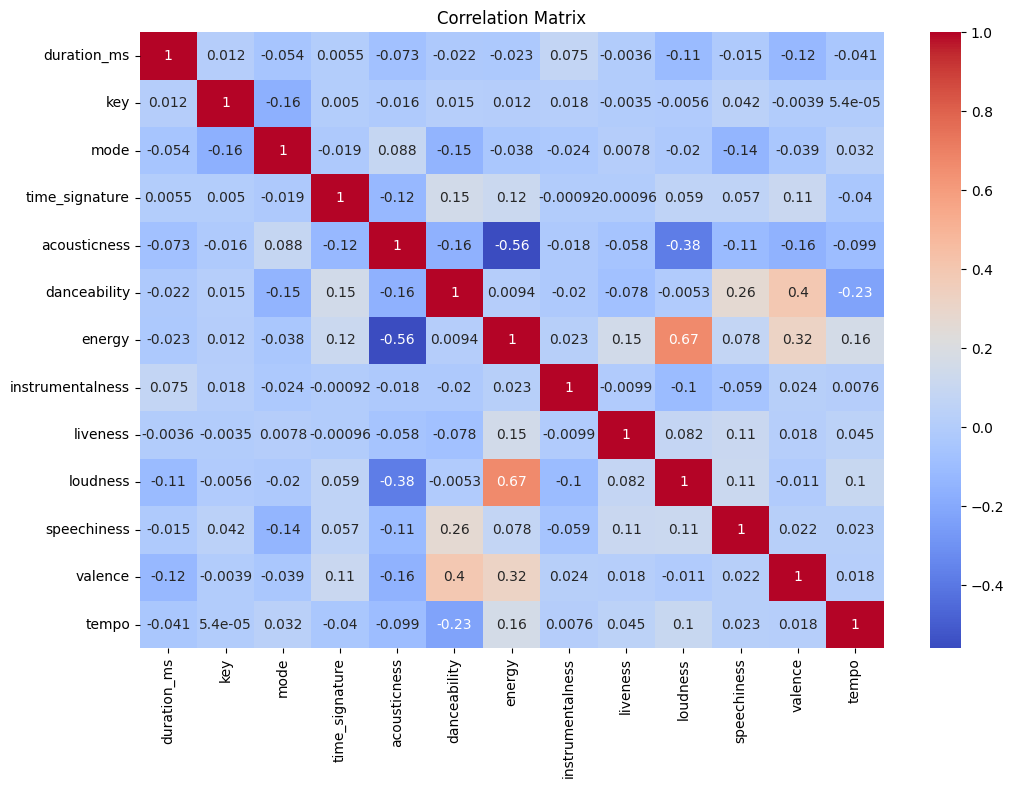

In [44]:
# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

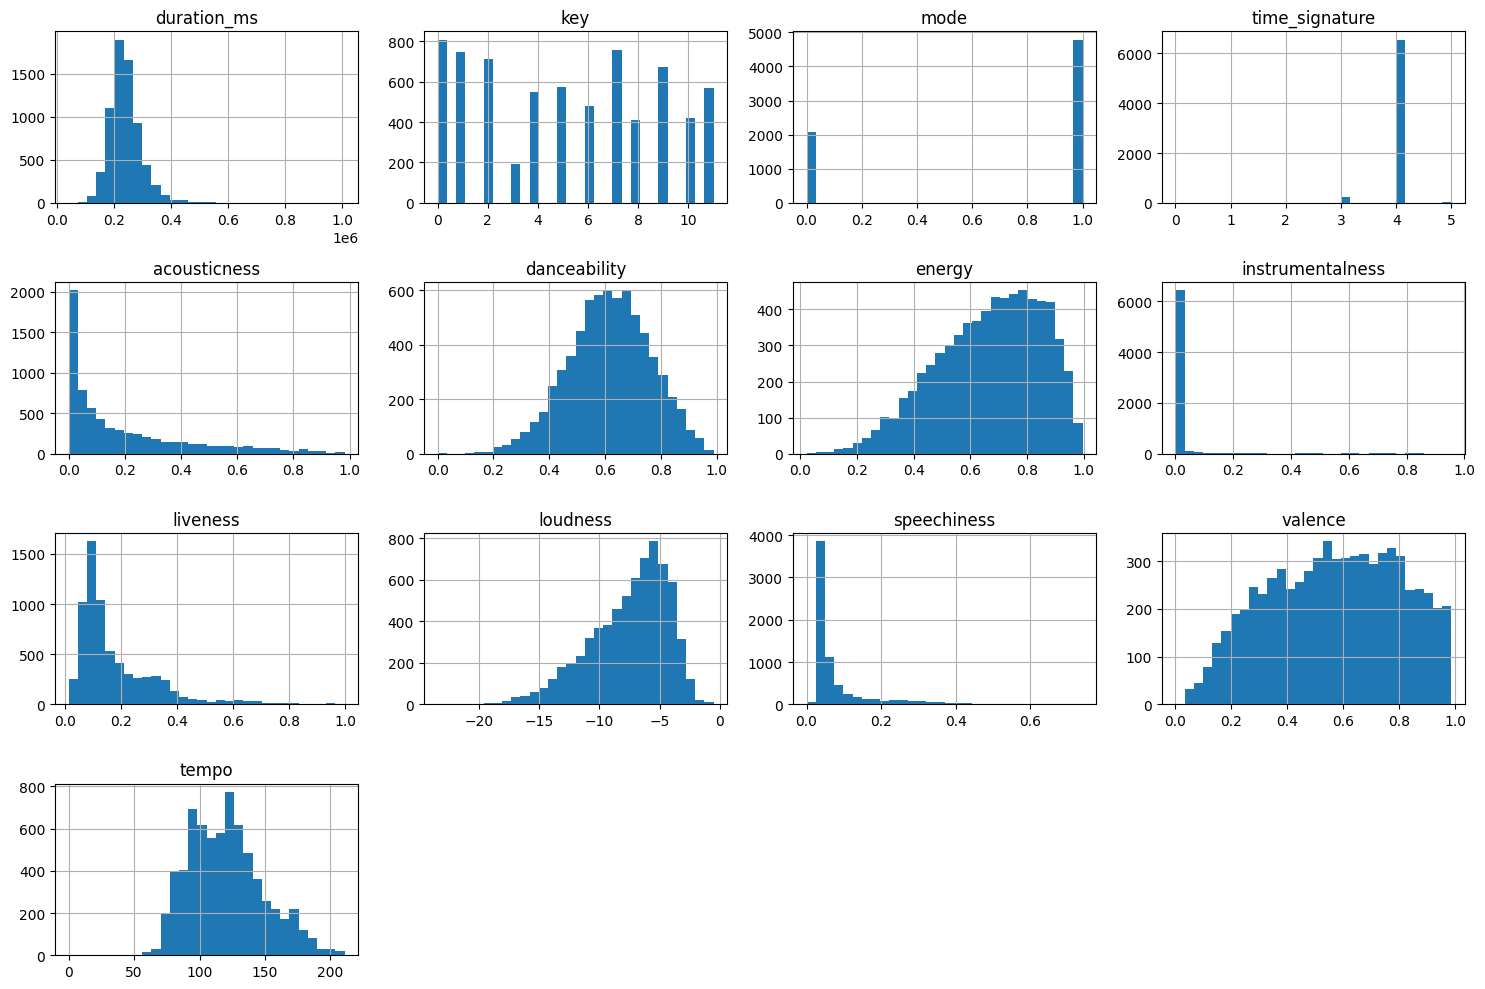

In [45]:
# Plot distributions of numerical features
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

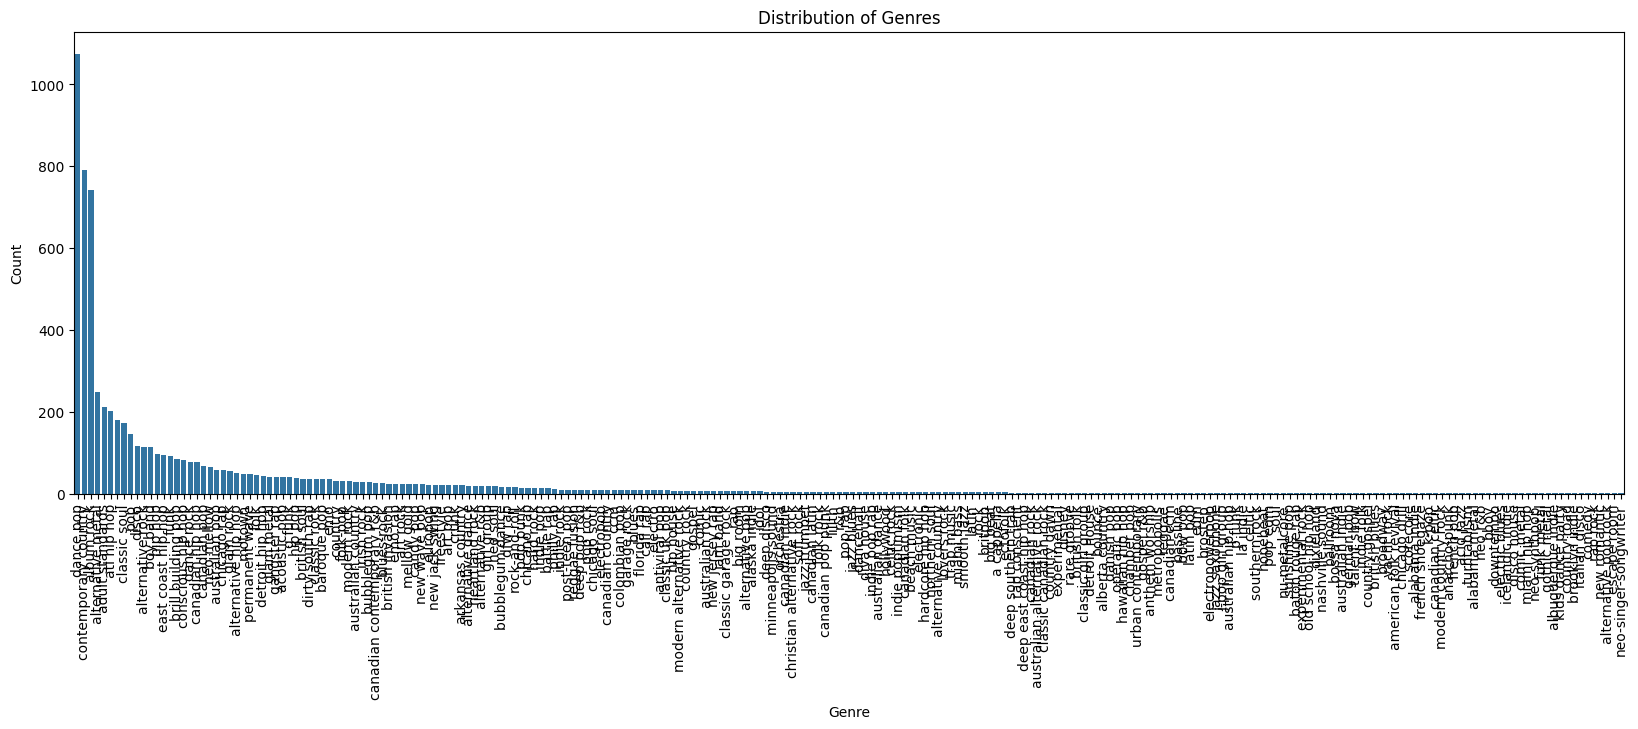

In [49]:
# Display the distribution of genres
genre_distribution = data['main_genre'].value_counts()

# Plot the distribution of genres
plt.figure(figsize=(20, 6))
sns.barplot(x=genre_distribution.index, y=genre_distribution.values)
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

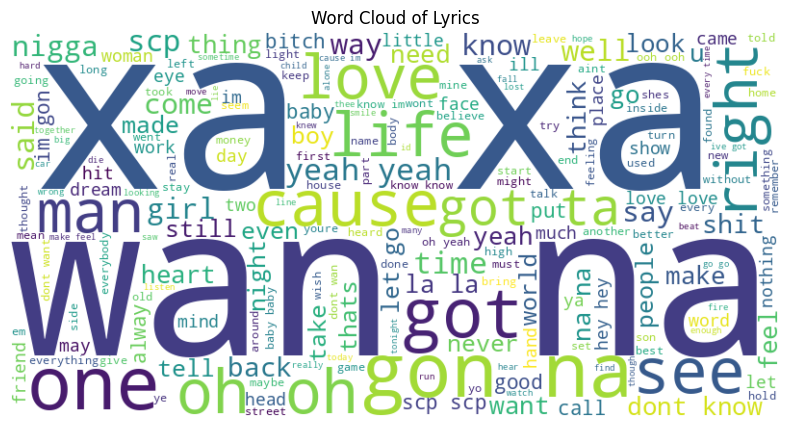

In [51]:
from wordcloud import WordCloud

# Generate a word cloud for the most frequent words in the lyrics
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['lyrics']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lyrics')
plt.show()

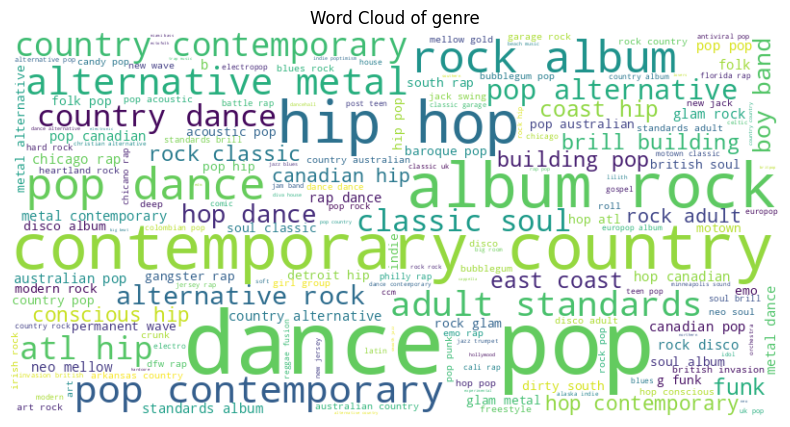

In [55]:
# Generate a word cloud for the most frequent genre
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['main_genre']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of genre')
plt.show()

In [56]:
# Drop the song_id column as it may not be as useful to us
data = data.drop('song_id', axis=1)

In [58]:
data.columns

Index(['duration_ms', 'key', 'mode', 'time_signature', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'valence', 'tempo', 'main_genre', 'lyrics'],
      dtype='object')

**Feature Extraction**

Transform the data into a suitable format for input into a neural network